## PI and EI under gaussian noise assumption in Bayesian Optimisation (BO)
PI and EI are two acquisition functions that returns Probability of Improvement and Expected Improvement with respect to current optima $\tilde{y}$.
In some cases, the evaluations on loss function has a noise $y_i \sim \mathcal{N} (f(\mathbf{x})_i,\sigma^2_y)$. 
PI and EI are modified under the assumption that current optima has a noise. They calcualtes Probability of Improvement and Expected Improvement with respect to 
posterior variance of loss optimum $ k(\tilde{\mathbf{x}},\tilde{\mathbf{x}})$ instead.  (where $\tilde{\mathbf{x}}$ is parameter setting at current optima.)

In [1]:
# Load the Python scripts that contain the Bayesian optimization and its acquisition functions PI,EI,MPI,MEI
from bo_acquis import *
# Load plotters for acquisition value and loss surface of acquisition functions in iterations
from plotters import *

### 1. Bemchmark functions
Define Bayesian Optimisation Benchmark Functions used to evalute  PI, EI, MPI, MEI. The full information about each function can be found at [link](http://www.resibots.eu/limbo/bo_benchmarks.html).

In [2]:
import numpy as np
def six_hump(params):
    x1 = params[0]
    x2 = params[1]
    term1 =(4-(2.1*(x1**2))+((x1**4)/3))*(x1**2)
    term2 = x1*x2
    term3 = (-4+4*(x2**2))*(x2**2)
    y = term1+term2+term3
    return y

def rastrigin(params):
    d = len(params)
    sum = 0
    for ii in range(0,d):
        x_i = params[ii]
        sum = sum + (x_i**2-10*np.cos(2*np.pi*x_i))
    y = 10*d+sum
    return y

def goldpr(params):
    x_1 = params[0]
    x_2 = params[1]
    fact1a = (x_1 + x_2 + 1)**2
    fact1b = 19 - 14*x_1 + 3*(x_1**2) - 14*x_2 + 6*x_1*x_2 + 3*(x_2**2)
    fact1 = 1 +fact1a*fact1b

    fact2a = (2*x_1 - 3*x_2)**2
    fact2b = 18 - 32*x_1 +12*(x_1**2) +48*x_2 - 36*x_1*x_2 + 27*(x_2**2)
    fact2 = 30 + fact2a + fact2b

    y = fact1*fact2
    return y

def rothyp(params):
    d = len(params)
    outer = 0
    for ii in range(0,d):
        inner = 0
        for  jj in range(0,ii):
            xj = params[jj]
            inner = inner + xj**2
        outer = outer+inner
    y = outer
    return y

def sphere(params):
    d = len(params)
    sum = 0

    for ii in range(0,d):
        x_i = params[ii]
        sum += x_i**2

    return sum

def goldprsc(params):
    x1bar = 4*params[0] - 2
    x2bar = 4*params[1] - 2
    fact1a = (x1bar + x2bar + 1)**2
    fact1b = 19 - 14 * x1bar + 3 * (x1bar**2) - 14*x2bar + 6*x1bar*x2bar + 3*(x2bar**2)
    fact1 = 1 + fact1a*fact1b

    fact2a = (2*x1bar - 3*x2bar)**2
    fact2b = 18 - 32*x1bar + 12*(x1bar**2) + 48*x2bar -36*x1bar*x2bar + 27*(x2bar**2)
    fact2 = 30 +fact2a*fact2b

    prod = fact1*fact2

    y = (np.log(prod) - 8.693) / 2.427

    return y

### 2. Parameters and features of each benchmark function
Each benchmark function has a dictionary of parameters which: 

Specify features of benchmark functions: the location of global optima and its value, name of the benchmark function (`optimials`, `optimals_val`, `benchmark_name`). 
Define the searching space that will perform Bayesian Optimisation on each bench mark function (`bounds`). 
Define pre-sampling locations (`pre_samples`). 
Define the meshgrid to plot benchmark function loss surface (`param_1`, `param_2`). 

In [3]:
import matplotlib.pyplot as plt

# perform Bayesian Optimisation on the benchmark function within given boundary

#SIX_HUMP parameters

six_hump_fetures ={'bounds':np.array([[-3, 3], [-2, 2]]),
                    'param_1':np.linspace(-3, 3, 60),
                    'param_2':np.linspace(-2, 2, 40),
                    'optimals':  [[0.0898,-0.7126],[-0.0898,0.7126]],
                    'optimals_val':-1.0316,
                    'bench_mark_name':"six_hump"
                    }
six_hump_fetures['pre_samples'] = np.random.uniform(six_hump_fetures['bounds'][:,0],
                                                    six_hump_fetures['bounds'][:,1],
                                                    (3,six_hump_fetures['bounds'].shape[0]))

##RASTRIGIN parameters


rastrigin_fetures ={'bounds':np.array([[-5.12, 5.12], [-5.12, 5.12]]),
                    'param_1':np.linspace(-5.12, 5.12, 80),
                    'param_2':np.linspace(-5.12, 5.12, 80),
                    'optimals':  [[0,0]],
                    'optimals_val':0,
                    'bench_mark_name':"rastrigin"
                    }
rastrigin_fetures['pre_samples'] = np.random.uniform(rastrigin_fetures['bounds'][:,0],
                                                    rastrigin_fetures['bounds'][:,1],
                                                    (3,rastrigin_fetures['bounds'].shape[0]))


##GOLDSTEIN-PRICE parameters

goldpr_fetures ={'bounds':np.array([[-2, 2], [-2, 2]]),
                    'param_1':np.linspace(-2, 2, 40),
                    'param_2':np.linspace(-2, 2, 40),
                    'optimals':  [[0,-1]],
                    'optimals_val':3,
                    'bench_mark_name':"goldstein"
                    }
goldpr_fetures['pre_samples'] = np.random.uniform(goldpr_fetures['bounds'][:,0],
                                                    goldpr_fetures['bounds'][:,1],
                                                    (3,goldpr_fetures['bounds'].shape[0]))

##RORATED HYPER-ELLIPSOID parameters

rothyp_fetures ={'bounds':np.array([[-65.536, 65.536], [-65.536, 65.536]]),
                    'param_1':np.linspace(-65.536, 65.536, 40),
                    'param_2':np.linspace(-65.536, 65.536, 40),
                    'optimals':  [[0,0]],
                    'optimals_val':0,
                    'bench_mark_name':"rotated_hyper_ellipsoid"
                    }
rothyp_fetures['pre_samples'] = np.random.uniform(rothyp_fetures['bounds'][:,0],
                                                    rothyp_fetures['bounds'][:,1],
                                                    (3,rothyp_fetures['bounds'].shape[0]))

##SPHERE parameters

sphere_fetures ={'bounds':np.array([[-5.12,5.12],[-5.12,5.12]]),
                    'param_1':np.linspace(-5.12,5.12, 80),
                    'param_2':np.linspace(-5.12,5.12, 80),
                    'optimals':  [[0,0]],
                    'optimals_val':0,
                    'bench_mark_name':"sphere"
                    }
sphere_fetures['pre_samples'] = np.random.uniform(sphere_fetures['bounds'][:,0],
                                                    sphere_fetures['bounds'][:,1],
                                                    (3,sphere_fetures['bounds'].shape[0]))    

# match parmeters with each benchmark function in a higher level dictionary 
sample_loss_fetures_dict = {six_hump:six_hump_fetures, rastrigin:rastrigin_fetures, goldpr:goldpr_fetures, rothyp:rothyp_fetures,sphere:sphere_fetures}

### 3. Plot contour of each benchmark function
Star here represents the global minimum of each function.

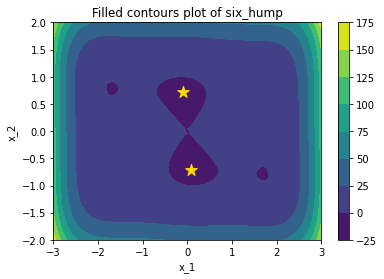

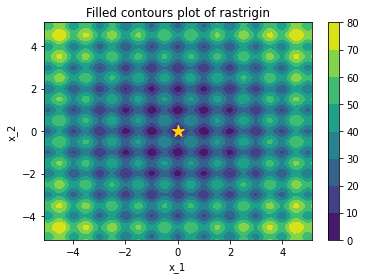

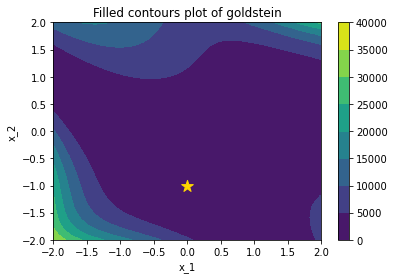

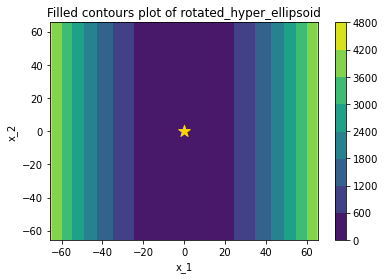

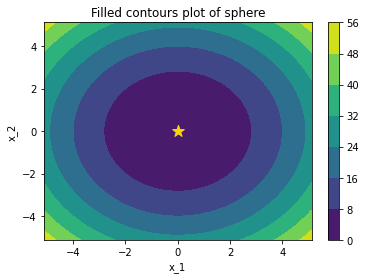

In [4]:
import os
benchmarks = [six_hump,rastrigin,goldpr,rothyp,sphere]
for bench_mark in benchmarks:
    bench_mark_fetures = sample_loss_fetures_dict[bench_mark]
    # We need the cartesian combination of these two vectors
    param_grid = np.array([[p1,p2] for p2 in bench_mark_fetures["param_2"] for p1 in bench_mark_fetures["param_1"]])
    real_loss = [bench_mark(params) for params in param_grid]

    C, G = np.meshgrid(bench_mark_fetures["param_1"], bench_mark_fetures["param_2"])
    plt.figure()
    cp = plt.contourf(C, G, np.array(real_loss).reshape(C.shape))
    plt.colorbar(cp)
    # plot optimal values as gold stars
    for optimum in bench_mark_fetures["optimals"]:
        plt.scatter(optimum[0],optimum[1], marker='*', c='gold', s=150)
    plt.title('Filled contours plot of '+bench_mark_fetures['bench_mark_name'])
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    bench_mark_fig_path = './'+bench_mark_fetures['bench_mark_name']+'/'
    if not os.path.exists(bench_mark_fig_path):
        os.makedirs(bench_mark_fig_path)
    plt.savefig(bench_mark_fig_path+'real_loss_'+bench_mark_fetures['bench_mark_name']+'.png', bbox_inches='tight',dpi = 300)

## 5. Try BO acquisations on benchmark functions
Define a job that runs baysian optimsation with a acquisation function on a benchmark function and returns loss get in each iteration.

In [5]:
import os
import imageio
import sklearn.gaussian_process as gp
np.random.seed(41)
# cumulative loss under each acquisition function

def benchmark_bo_acquisitions(lock,idx_of_acqui,sample_loss,iterats,add_noise, plot_iterations, sample_loss_fetures_dict):
    """
    Benchmark Baysian Optimisition when it adopts different acquisition functions on pre-defined benchmark function
    
    Parameters
    ----------
    lock : Threading Lock
        prevent matplotlib instance rewritting in multithreading execution
    idx_of_acqui: int
        Index of looped acquisition function
    sample_loss : func
        Bayesian optimisation benchmark function 
    iterats: int
        Number of iterations to perform Bayesian Optimisation
    add_noise: boolean
        Choose if add noise to benchmark function
    plot_iterations : boolean
        Choose if to plot estimated loss and acquisition surface for each iteration 
        greater_better : boolean
    sample_loss_fetures_dict : dict
        Optimal value information and pre-defined search space on each benchmark function
    Returns
    -------
    lowest_loss : dict
        Lowest loss of acquisition function get in current benchmark function
    idx_of_acqui : int
        Specifies the index of currently used acquisation in ["PI","EI","MPI","MEI"] 
        Defined here just in convenience of passing the parameter
    """
    
    greater_better = False
    sample_loss_fetures = sample_loss_fetures_dict[sample_loss]
    bench_mark_name = sample_loss_fetures['bench_mark_name']
    acqui_names = ["PI","EI","MPI","MEI"]
    acquis = [probability_improvement,expected_improvement,Mprobability_improvement,Mexpected_improvement]
    if add_noise:
        fig_path = "./"+bench_mark_name+"/add_noise/"+acqui_names[idx_of_acqui]+"_"+bench_mark_name+"/"
    else:
        fig_path = "./"+bench_mark_name+"/noise_less/"+acqui_names[idx_of_acqui]+"_"+bench_mark_name+"/"
    if not os.path.exists(fig_path):
        os.makedirs(fig_path)
    acqui = acquis[idx_of_acqui]
    if add_noise:
        def sample_loss_with_noise(params):
            # add a gaussian noise to benchmark function
            y = sample_loss(params)
            y += float(np.random.normal(0,10,1))
            return y
        xp, yp = bayesian_optimisation(n_iters=iterats,
                                    sample_loss=sample_loss_with_noise,
                                    bounds=sample_loss_fetures['bounds'],
                                    x0 = sample_loss_fetures['pre_samples'],
                                    # surrogate model GP has default Matern kernel, add WhiteKernel to 
                                    # learn the noise and update uncertainty quantification at evaluated points
                                    gp_params = {'kernel':gp.kernels.Matern()+gp.kernels.WhiteKernel(),
                                                # if we do not add white kernel, variance at evaluated points is alpha
                                                'alpha':1e-5,
                                                'n_restarts_optimizer':10,
                                                'normalize_y':True},
                                    random_search=10000,
                                    greater_is_better=greater_better,
                                    acquisition_func=acqui)
    else:
        xp, yp = bayesian_optimisation(n_iters=iterats,
                                    sample_loss=sample_loss,
                                    bounds=sample_loss_fetures['bounds'],
                                    x0 = sample_loss_fetures['pre_samples'],
                                     gp_params = {'kernel':gp.kernels.Matern()+gp.kernels.WhiteKernel(),
                                                'alpha':1e-5,
                                                'n_restarts_optimizer':10,
                                                'normalize_y':True},
                                    random_search=10000,
                                    greater_is_better=greater_better,
                                    acquisition_func=acqui)

    # i0: number of initial guesses
    i0 = 3
    y0 = sample_loss_fetures['optimals_val']
    ys = yp[i0:] - y0
    # print(bench_mark_name+" "+acqui_names[idx_of_acqui]+" The minimum loss is: "+str(ys[ys.argmin()])+" Total iterations: "+str(ys.argmin()-2))
    curr_lowest_loss = 1000
    # cummulative lowest loss at current iteration
    lowest_loss = []
    for yy in ys:
        if yy<curr_lowest_loss:
            curr_lowest_loss = yy
        lowest_loss.append(curr_lowest_loss)
    
    if plot_iterations:
        lock.acquire()
        plot_iteration(first_param_grid = sample_loss_fetures['param_1'], sampled_params = xp, sampled_loss = yp, first_iter=1, second_param_grid=sample_loss_fetures['param_2'], filepath=fig_path,
                    optimum=sample_loss_fetures['optimals'],
                    acquisition_func = acqui,greater_is_better=greater_better)
        images = []
        for i in range(0, iterats):
            filename = fig_path+"bo_iteration_%d.png" % i
            images.append(imageio.imread(filename))
        imageio.mimsave(fig_path+'bo_2d_new_data.gif', images, duration=1.0)
        lock.release()
    return lowest_loss,idx_of_acqui


Parallel Execute Bayesian Optimisation with 4 types of acquisition functions on benchmark functions.
In order to test acquisition functions in noise corrupted parameter space, we can choose whether to add a gaussian noise $\sigma \sim \mathcal{N}(0,1)$ in sampling benchmark function by parameter `add_noise`.
Estimited Loss and acquisition value surface at each iteration are plotted at `.\acquisition_function\`


In [6]:
import pandas as pd
from threading import Lock
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import as_completed
import warnings    
executor = ThreadPoolExecutor(max_workers=12)   
warnings.filterwarnings('ignore')
acquis = [probability_improvement,expected_improvement,Mprobability_improvement,Mexpected_improvement]
# benchmarks = [six_hump, rastrigin, goldpr, rothyp,sphere]
# running parameters for parallelable benchmark_bo_acquisitions
plot_iterations = True
# the benchmark function to evaluate acquisition functions
bench_mark = sphere
# if add gaussian noise N(0,1) at each sampling to benchmark function
add_noise = True
# number of iterations to perform Bayesian Optimisation
iterats = 45
lock = Lock()

# uncomment to loop through all benchmark functions under both conditions of adding noise into and no noise
#  
# for bench_mark in benchmarks:
#     for add_noise in [True,False]:
all_task = [executor.submit(benchmark_bo_acquisitions,lock,idx_of_acqui,bench_mark,iterats,add_noise,plot_iterations,sample_loss_fetures_dict)
for idx_of_acqui in range(len(acquis))]

lowest_loss_acquis = {"PI": [], "EI" : [],"MPI":[],"MEI":[]}
acqui_names = ["PI","EI","MPI","MEI"]

for future in as_completed(all_task):
    lowest_loss,acqui_idx = future.result()
    lowest_loss_acquis[acqui_names[acqui_idx]] = lowest_loss

lowest_loss_acquis = pd.DataFrame.from_dict(lowest_loss_acquis)

bench_mark_name = sample_loss_fetures_dict[bench_mark]["bench_mark_name"]
if add_noise:
    lowest_loss_acquis.to_excel("./"+bench_mark_name+"/"+"add_noise/"+"lowest_loss_in_iter.xlsx")
else:
    lowest_loss_acquis.to_excel("./"+bench_mark_name+"/"+"noise_less/"+"lowest_loss_in_iter.xlsx")


Plot cummulative lowest loss that different acquisition functions (with Bayesian Optimisation) get in iterations. 
Lowest loss can be smaller than 0 due to gaussian noise added when sampling the benchmark function.

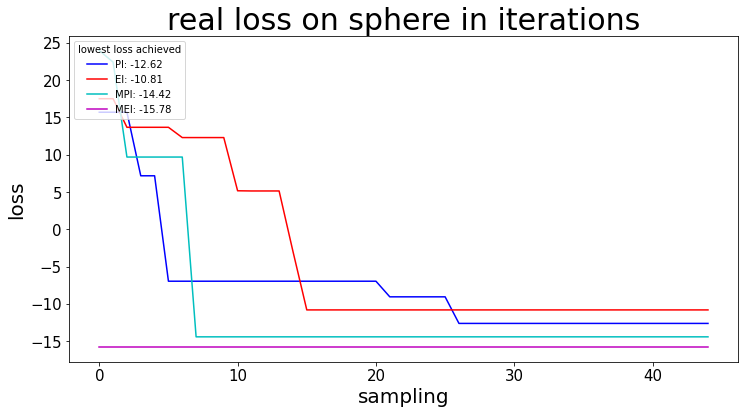

In [7]:
import pandas as pd

# uncomment to loop through all benchmark functions under conditions of adding noise
# add_noise = True
# for bench_mark in benchmarks:
bench_mark_fetures = sample_loss_fetures_dict[bench_mark]
bench_mark_name = bench_mark_fetures["bench_mark_name"]
if add_noise:
    loss_fig_path = "./"+bench_mark_name+"/add_noise/"
else:
    loss_fig_path = "./"+bench_mark_name+"/noise_less/"

lowest_loss_acquis = pd.read_excel(loss_fig_path+"lowest_loss_in_iter.xlsx")

acqui_names = lowest_loss_acquis.columns[1:]

n = len(lowest_loss_acquis)
x = np.linspace(0, n-1, n)
colors = ['b','r','c','m']
fig = plt.figure(figsize=(12, 6))
# loop through all acquisition functions
for acqui_idx in range(len(acqui_names)):
    # loss can be smaller than 0 due to noise added
    plt.plot(x, lowest_loss_acquis[acqui_names[acqui_idx]], color=colors[acqui_idx], linestyle='-',
            label = acqui_names[acqui_idx]+str(": %.2f" % np.min(lowest_loss_acquis[acqui_names[acqui_idx]])))
plt.title("real loss on "+bench_mark_name+" in iterations",fontsize=30)
plt.xlabel("sampling",fontsize=20)
plt.ylabel("loss",fontsize=20)
plt.xticks(fontsize =15)
plt.yticks(fontsize=15)
plt.legend(loc = 'upper left', title="lowest loss achieved")
plt.savefig(loss_fig_path+"loss_in_iterations.png",dpi = 300)
plt.show()

Run Bayesian Optimistaion 10 times on a benchmark function to evaluate average performance, lowest loss get in each run by 4 acquisition functions
are saved at `.\benchmark_func\*\loss_in_trail.xlsx`

In [18]:
import pandas as pd
from threading import Lock
from concurrent.futures import ThreadPoolExecutor
from concurrent.futures import as_completed
import warnings    
executor = ThreadPoolExecutor(max_workers=12)   
warnings.filterwarnings('ignore')
# running parameters for parallelable benchmark_bo_acquisitions
plot_iterations = False
# the benchmark function to evaluate acquisition functions
bench_mark = sphere
# if add gaussian noise N(0,1) at each sampling to benchmark function
add_noise = False
# number of iterations to perform Bayesian Optimisation
iterats = 45
lock = Lock()

acquis = [probability_improvement,expected_improvement,Mprobability_improvement,Mexpected_improvement]
acqui_names = ["PI","EI","MPI","MEI"]

# uncomment to loop through all benchmark functions under both conditions of adding noise into and no noise
# for bench_mark in benchmarks:
#     for add_noise in [True]:

acqui_loss_in_trail = {"PI": [], "EI" : [],"MPI":[],"MEI":[]}
all_task = [executor.submit(benchmark_bo_acquisitions,lock,idx_of_acqui,bench_mark,iterats,add_noise,plot_iterations,sample_loss_fetures_dict) 
for idx_of_acqui in range(len(acquis)) for trial in range(30)]
for future in as_completed(all_task):
    lowest_loss,acqui_idx = future.result()
    acqui_loss_in_trail[acqui_names[acqui_idx]].append(lowest_loss[-1])
acqui_loss_in_trail_pd = pd.DataFrame.from_dict(acqui_loss_in_trail)
bench_mark_fetures = sample_loss_fetures_dict[bench_mark]
bench_mark_name = bench_mark_fetures["bench_mark_name"]
if add_noise:
    excel_path = "./"+bench_mark_name+"/"+"add_noise/"

else:
    excel_path = "./"+bench_mark_name+"/"+"noise_less/"

if not os.path.exists(excel_path):
    os.makedirs(excel_path)
acqui_loss_in_trail_pd.to_excel(excel_path+"loss_in_trail.xlsx") 
